In [13]:
import sys
sys.path.append("..")
from blog_tools import data, embed
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import phate
import scprep
import ipywidgets as widgets

In [14]:
data_loaders = data.__all__
algorithms = embed.__all__

/home/scottgigante/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components
/home/scottgigante/.local/lib/python3.7/site-packages/sklearn/neighbors/base.py:216: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/scottgigante/.local/lib/python3.7/site-packages/sklearn/neighbors/base.py:216: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:246: RuntimeWarning: Detected zero distance between 240 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning)
/home/scottgigante/.local/lib/python3.7/site-packages/graphtools/graphs.py:359: RuntimeWarning: divide by zero encountered in true_divide
  for i in range(len(

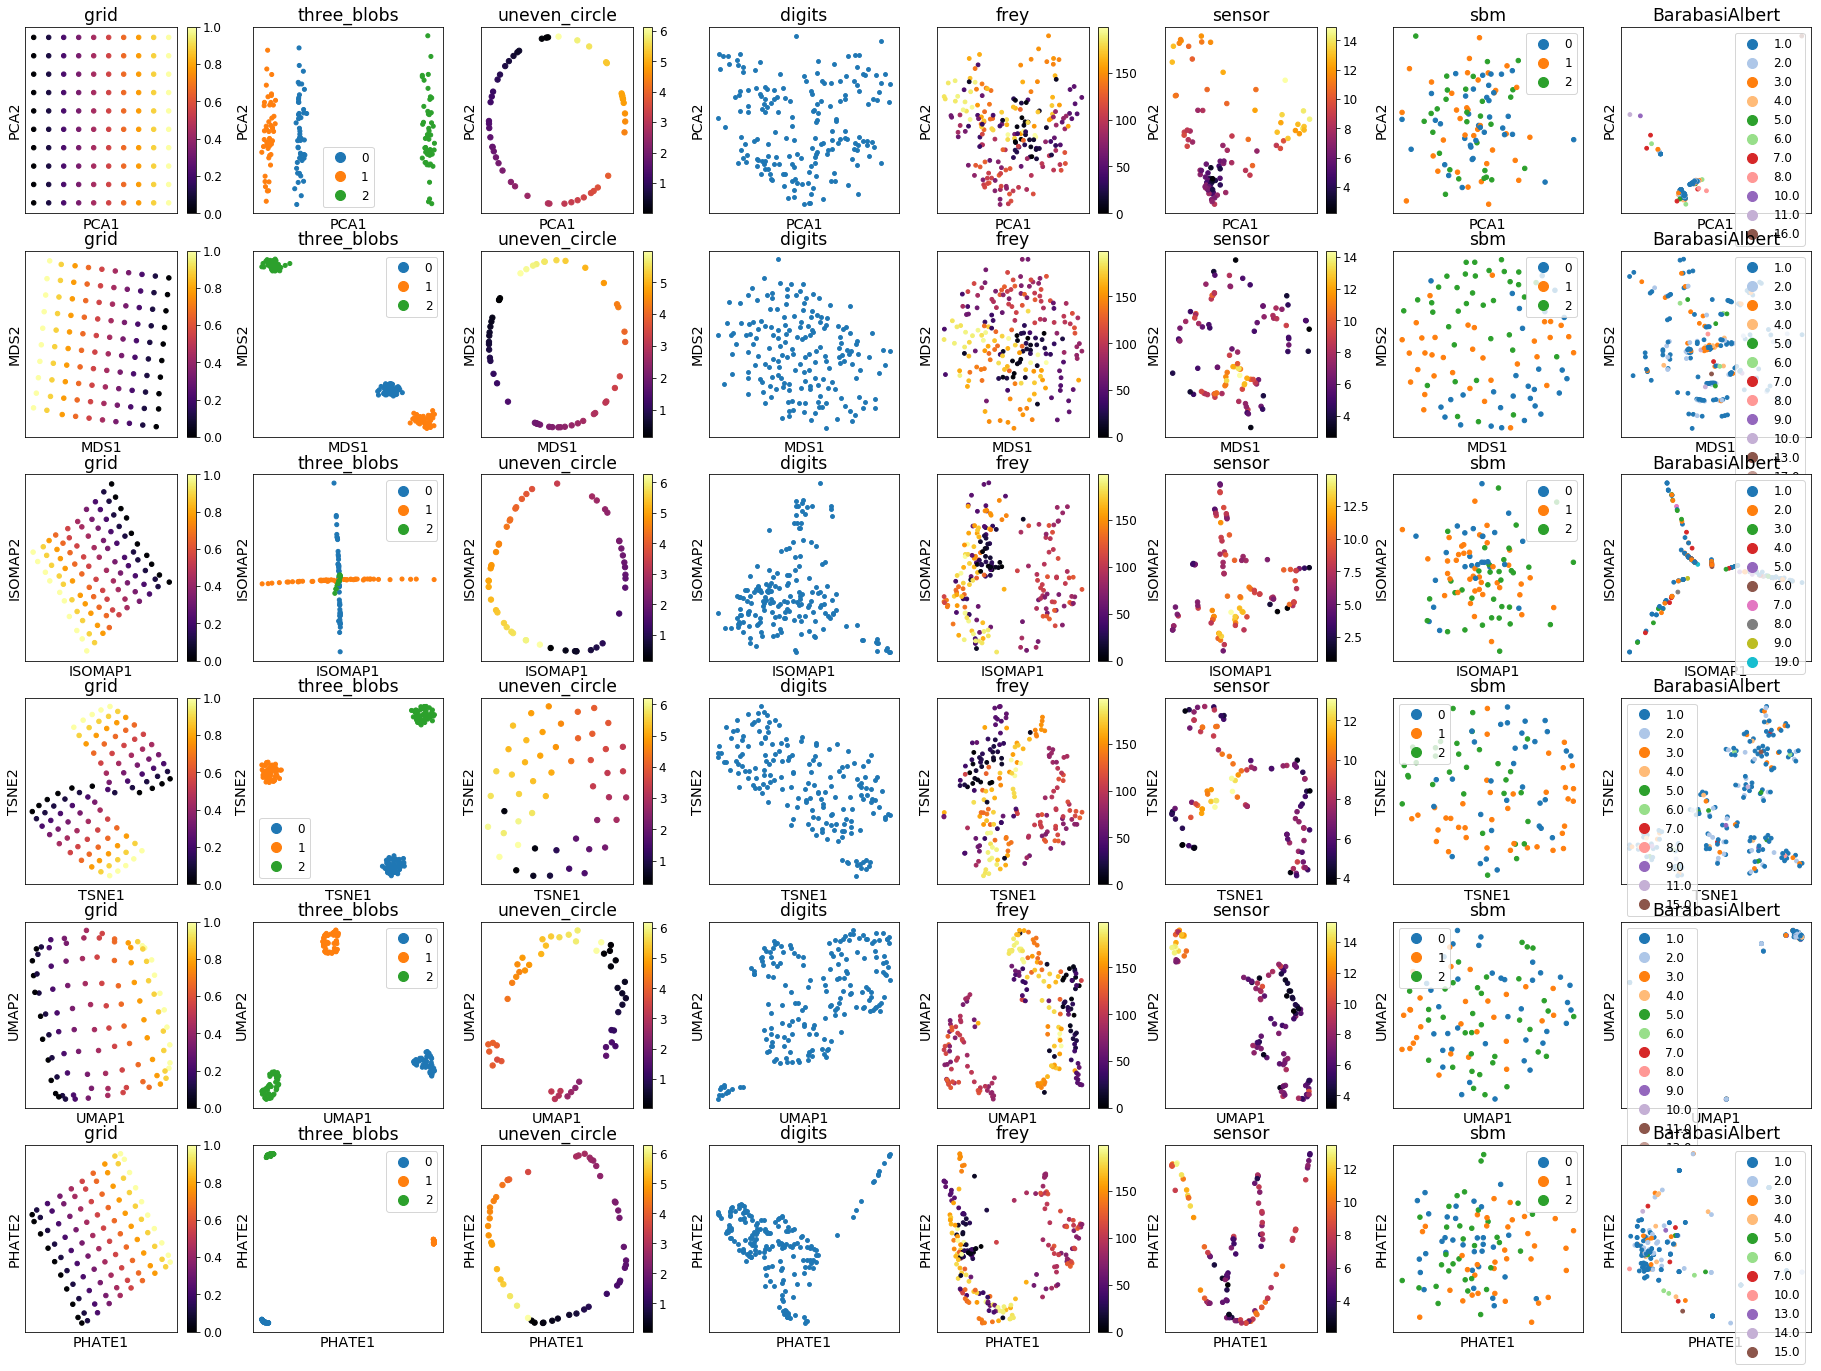

In [17]:
fig, axes = plt.subplots(len(algorithms), len(data_loaders), figsize=(len(data_loaders)*4, len(algorithms)*4))
for algorithm, axis in zip(algorithms, axes):
    for loader, ax in zip(data_loaders, axis):
        dataset = loader()
        Y = algorithm(dataset.X, dataset.is_graph)
        scprep.plot.scatter2d(Y, c=dataset.c, ticks=False, label_prefix=algorithm.__name__, ax=ax,
                             title=dataset.name)

In [18]:
children = []
for algorithm, axis in zip(algorithms, axes):
    out = widgets.Output()
    children.append(out)
    with out:
        fig, axes = plt.subplots(1, len(data_loaders), figsize=(len(data_loaders)*4, 4))
        for loader, ax in zip(data_loaders, axes):
            dataset = loader()
            Y = algorithm(dataset.X, dataset.is_graph)
            scprep.plot.scatter2d(Y, c=dataset.c, ticks=False, label_prefix=algorithm.__name__, ax=ax,
                                 title=dataset.name)
        plt.show(fig)


tab = widgets.Tab(children = children)
for i, algorithm in enumerate(algorithms):
    tab.set_title(i, algorithm.__name__)

display(tab)

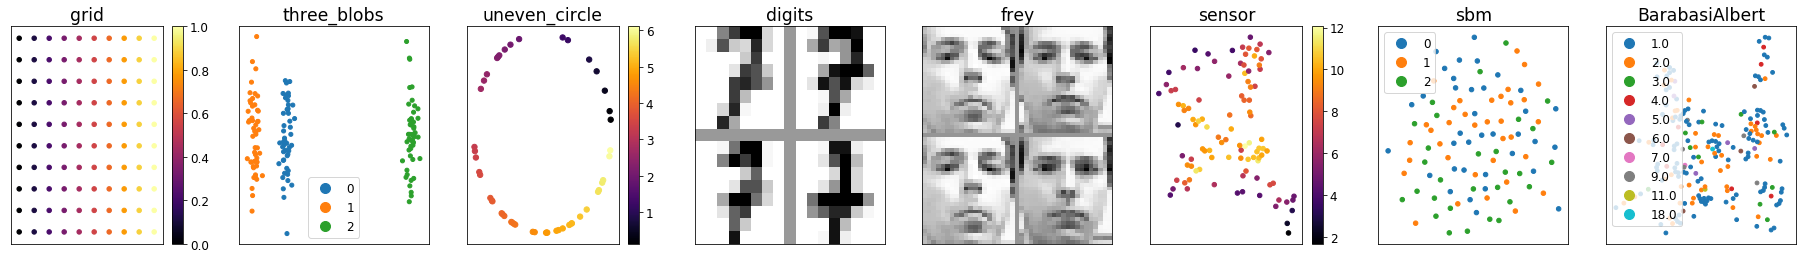

In [4]:
fig, axes = plt.subplots(1, len(data_loaders), figsize=(len(data_loaders)*4, 4))
for loader, ax in zip(data_loaders, axes):
    dataset = loader()
    X = dataset.X
    if dataset.is_graph:
        X = embed.Spring(X, is_graph=True)
    if hasattr(dataset, "X_raw"):
        # image data
        select_idx = np.random.choice(len(dataset.X_raw), 4)
        plot_image = np.vstack([np.hstack([dataset.X_raw[select_idx[0]], np.repeat(125, dataset.X_raw.shape[1])[:,None], dataset.X_raw[select_idx[1]]]),
                               np.repeat(125, dataset.X_raw.shape[2]*2+1)[None,:],
                               np.hstack([dataset.X_raw[select_idx[2]], np.repeat(125, dataset.X_raw.shape[1])[:,None], dataset.X_raw[select_idx[3]]])])
        ax.imshow(plot_image, cmap='Greys', aspect='auto')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(dataset.name, fontsize='xx-large')
    else:
        scprep.plot.scatter2d(X, c=dataset.c, ticks=False, ax=ax,
                         title=dataset.name)

In [5]:
plot_image.shape

(57, 41)

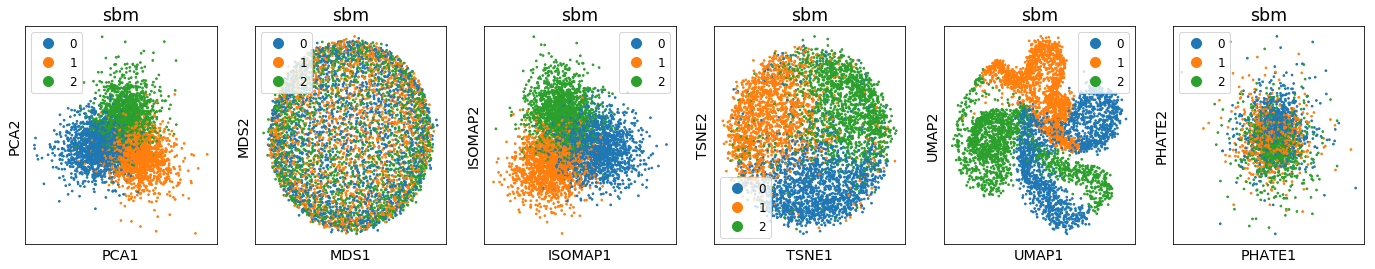

In [8]:
fig, axes = plt.subplots(1, len(algorithms), figsize=(len(algorithms)*4, 4))
for algorithm, ax in zip(algorithms, axes):
    dataset = data.sbm(size=5000, p=0.01, q=0.005)
    Y = algorithm(dataset.X, dataset.is_graph)
    scprep.plot.scatter2d(Y, c=dataset.c, ticks=False, label_prefix=algorithm.__name__, ax=ax,
                         title=dataset.name)